In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from Data import sample_1
from Evaluate import evaluate

sys.path.insert(0, "../Code")
from Core import acc


**How many samples do we need to learn on a dataset with no spurious correlation?**

In [2]:
n_all = [2500, 5000, 7500, 10000, 15000]
dist_all = []
neut_all = []

for n in n_all:
    model, X_train, X_val, X_test, X_neutral, Y_train, Y_val, Y_test, Y_neutral = \
    evaluate(sample_1, n = n, p = 0.5, name = "Experiment1")
    
    dist_all.append(acc(model, X_test, Y_test))
    neut_all.append(acc(model, X_neutral, Y_neutral))
    

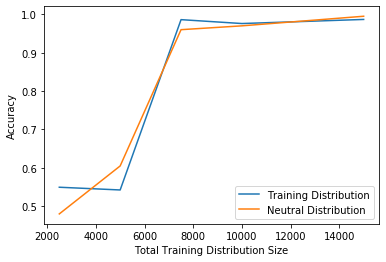

In [3]:
plt.plot(n_all, dist_all, label = "Training Distribution")
plt.plot(n_all, neut_all, label = "Neutral Distribution")
plt.ylabel("Accuracy")
plt.xlabel("Total Training Distribution Size")
plt.legend()
plt.savefig("Experiment1-Samples.pdf")
plt.show()
plt.close()

**How strong does the spurious correlation have to be before the model learns to use it?**

In [4]:
n = 10000
p_all = [0.75, 0.8, 0.825, 0.85, 0.875, 0.9, 1.0]
dist_all = []
neut_all = []

for p in p_all:
    model, X_train, X_val, X_test, X_neutral, Y_train, Y_val, Y_test, Y_neutral = \
    evaluate(sample_1, n = n, p = p, name = "Experiment1")
    
    dist_all.append(acc(model, X_test, Y_test))
    neut_all.append(acc(model, X_neutral, Y_neutral))
    

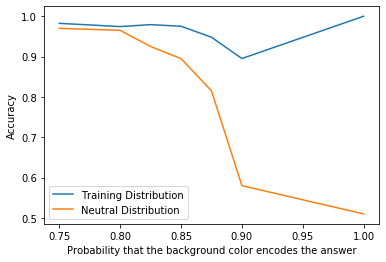

In [5]:
plt.plot(p_all, dist_all, label = "Training Distribution")
plt.plot(p_all, neut_all, label = "Neutral Distribution")
plt.ylabel("Accuracy")
plt.xlabel("Probability that the background color encodes the answer")
plt.legend()
plt.savefig("Experiment1-Strength.pdf")
plt.show()
plt.close()